# Importing Libraries

Pandas: Used to store data into dataframes
Matplotlib: Used for Plotting Graphs
Requests: Used for fetching data from url
Json: Used to parse the JSON data from website
openpyxl: Used for storing graph images

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# Parsing URL
Make a request for fetching url and storing JSON data on that url into a local file

In [2]:
url = "https://disease.sh/v3/covid-19/countries"
response = requests.get(url)
data = response.json()
with open('Covid-Data.json', 'w') as f:
    json.dump(data, f, indent=4)

# Creating Dataframes
From the JSON data we stored, we normalize it and store in the dataframe with respected columns, and remove unwanted values

In [3]:
df = pd.json_normalize(data)
df = df[['country', 'cases', 'deaths', 'recovered', 'active', 'tests', 'population']]
df.dropna(inplace=True)
print(df.head())

       country   cases  deaths  recovered  active    tests  population
0  Afghanistan  234174    7996     211080   15098  1390730    40754388
1      Albania  334863    3605     330233    1025  1941032     2866374
2      Algeria  272010    6881     183061   82068   230960    45350148
3      Andorra   48015     165          0   47850   249838       77463
4       Angola  107327    1937     103419    1971  1499795    35027343


# Analyze Healthcare
Calculate several factors like death rate, tests per case and survival rate

In [4]:
df['death_rate'] = (df['deaths'] / df['cases']).round(4) * 100
df['recovery-rate'] = (df['recovered'] / df['cases']).round(4) * 100
df['tests-per-case'] = (df['tests'] / df['cases']).round(2)
print(df[['country', 'death_rate', 'recovery-rate', 'tests-per-case']].head())

       country  death_rate  recovery-rate  tests-per-case
0  Afghanistan        3.41          90.14            5.94
1      Albania        1.08          98.62            5.80
2      Algeria        2.53          67.30            0.85
3      Andorra        0.34           0.00            5.20
4       Angola        1.80          96.36           13.97


# Sorting Dataframe
sort countries by different parameters like most deaths, least deaths, highest recovery etc.

In [5]:
mostAffected = df.sort_values(by='cases', ascending=False).head(10)
leastAffected = df.sort_values(by='cases', ascending=True).head(10)
highestDeathRate = df.sort_values(by='death_rate', ascending=False).head(10)
lowestDeathRate = df.sort_values(by='death_rate', ascending=True).head(10)
mostActiveCases = df.sort_values(by='active', ascending=False).head(10)

print("Top 3 Most Affected Countries:\n", mostAffected[['country', 'cases']].head(3).to_string(index=False))
print("Top 3 Least Affected Countries:\n", leastAffected[['country', 'cases']].head(3).to_string(index=False))
print("Top 3 Countries with Highest Death Rate:\n", highestDeathRate[['country', 'death_rate']].head(3).to_string(index=False))
print("Top 3 Countries with Lowest Death Rate:\n", lowestDeathRate[['country', 'death_rate']].head(3).to_string(index=False))
print("Top 3 Countries with Most Active Cases:\n", mostActiveCases[['country', 'active']].head(3).to_string(index=False))

Top 3 Most Affected Countries:
 country     cases
    USA 111820082
  India  45035393
 France  40138560
Top 3 Least Affected Countries:
                       country  cases
                   MS Zaandam      9
               Western Sahara     10
Holy See (Vatican City State)     29
Top 3 Countries with Highest Death Rate:
        country  death_rate
    MS Zaandam       22.22
         Yemen       18.07
Western Sahara       10.00
Top 3 Countries with Lowest Death Rate:
                       country  death_rate
  Falkland Islands (Malvinas)         0.0
                 Saint Helena         0.0
Holy See (Vatican City State)         0.0
Top 3 Countries with Most Active Cases:
 country   active
  India 44501823
  Japan 33728878
 Turkey 17129892


# Storing and Plotting Data.
Store the collected data into excel file and the analysis we made are plotted on graph

In [6]:
df.to_excel("covid_report.xlsx", index=False)  #saving to Excel

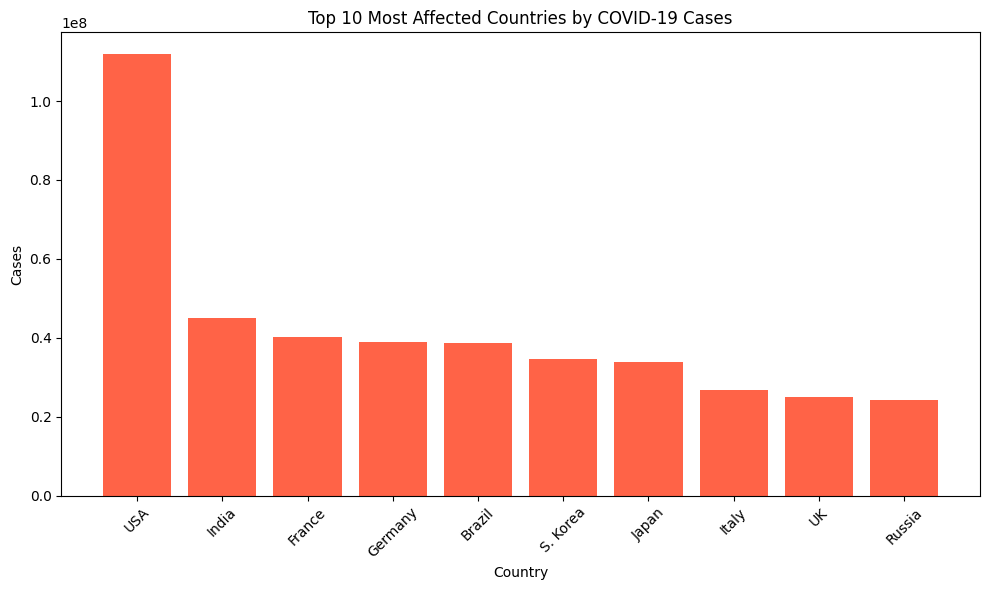

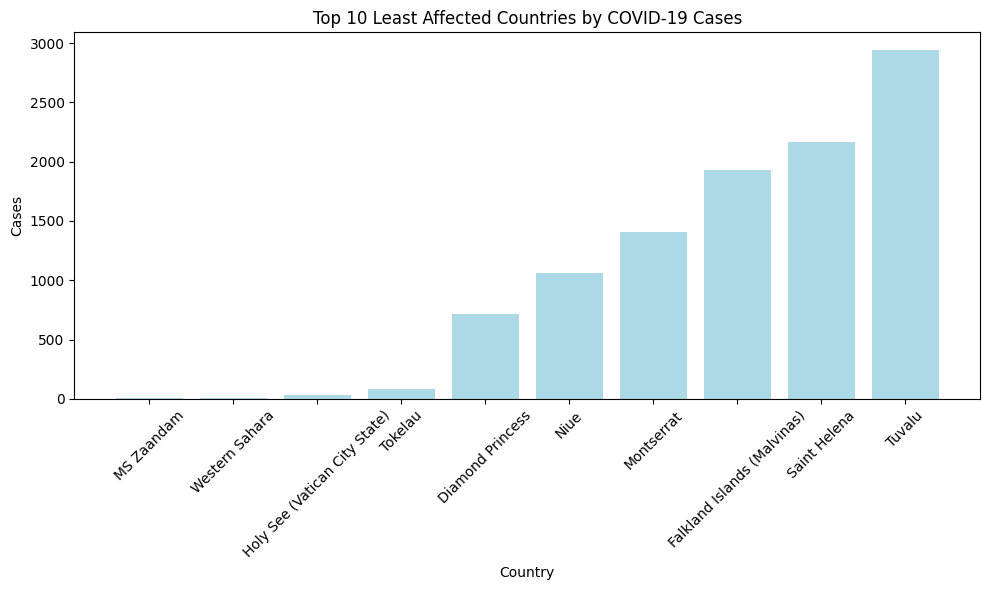

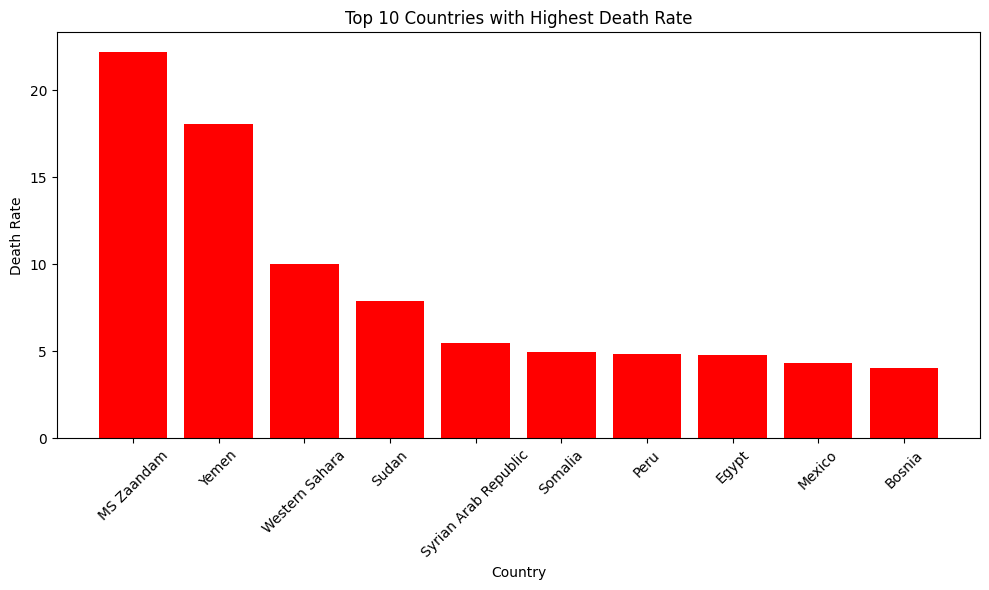

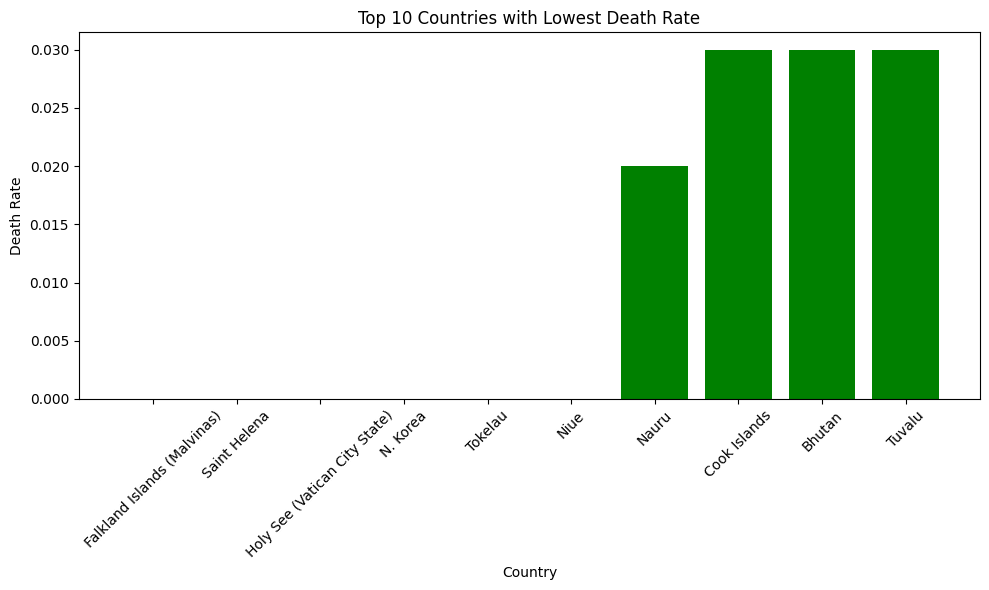

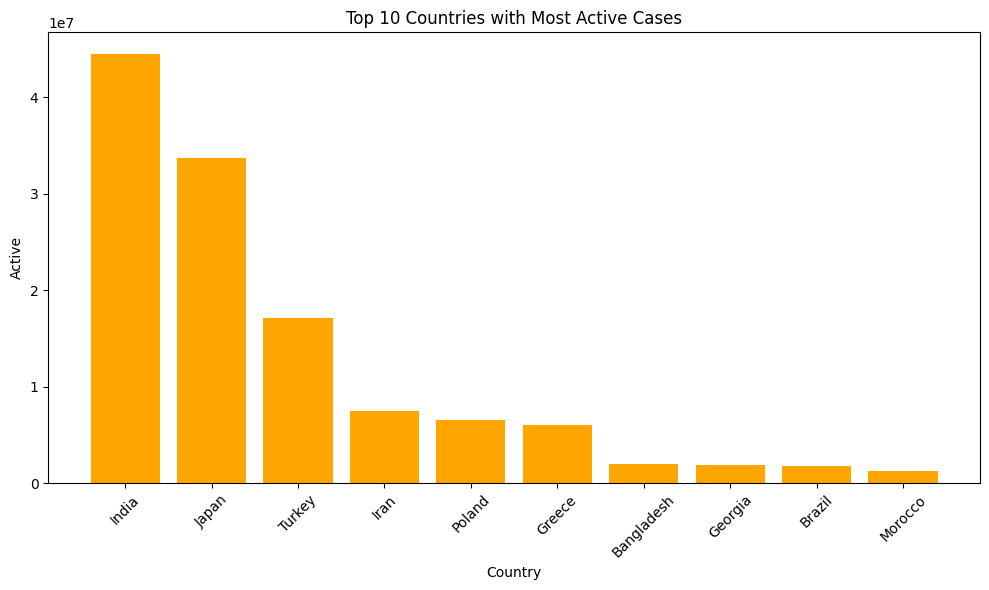

In [7]:
def createChart(df, column, title, filename, color='tomato'):
    plt.figure(figsize=(10,6))
    plt.bar(df['country'], df[column], color=color)
    plt.title(title)
    plt.xlabel("Country")
    plt.ylabel(column.replace("_", " ").title())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()

createChart(mostAffected, 'cases', 'Top 10 Most Affected Countries by COVID-19 Cases', 'most_affected_cases')
createChart(leastAffected, 'cases', 'Top 10 Least Affected Countries by COVID-19 Cases', 'least_affected_cases', color='lightblue')
createChart(highestDeathRate, 'death_rate', 'Top 10 Countries with Highest Death Rate', 'highest_death_rate', color='red')
createChart(lowestDeathRate, 'death_rate', 'Top 10 Countries with Lowest Death Rate', 'lowest_death_rate', color='green')
createChart(mostActiveCases, 'active', 'Top 10 Countries with Most Active Cases', 'most_active_cases', color='orange')